# About this Notebook

This notebook illustrated and used for traning a DNN model by using FastAI.

**Data**: Peptide seqeunce in numpy array that generated form JAX-Unirep

**ML model**: Tabular learner for Binary Classification (0 AMPs, 1 NonAMPs)

* Baseline Model
* Finetuning the baseline 
* Evaluation 
* Test prediction with test set

------

# Prepare Environment

In [1]:
from sklearn.metrics import classification_report 

from fastai.tabular.all import *
from fastai.basics import *
from fastai import *

import numpy as np
import pandas as pd

#defaults.device = torch.device('cpu')
# np.set_printoptions(threshold=np.inf)

In [ ]:
import pickle5 as pickle
with open( "/mnt/vdb/thesis/jax/AMPNonAMP.V5_C08_sim60.reps", 'rb') as file:
    AMPs_df = pickle.load(file)

In [3]:
# PWS
with open( "/mnt/vdb/thesis/pwm/AMPnonAMP.sim60_c08.pssm.pkl", 'rb') as file:
    AMPs_df = pickle.load(file)
reps_columns =['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'
,'16','17','18','19','20','21','22','23','24','25','26','27','28','29'
,'30','31','32','33','34','35','36','37','38','39','40','41','42','43'
,'44','45','46','47','48','49','50','51','52','53','54','55','56','57'
,'58','59','60','61','62','63','64','65','66','67','68','69','70','71'
,'72','73','74','75','76','77','78','79','80','81','82','83','84','85'
,'86','87','88','89','90','91','92','93','94','95','96','97','98','99'
,'100','101','102','103','104','105','106','107','108','109','110','111'
,'112','113','114','115','116','117','118','119','120','121','122','123'
,'124','125','126','127','128','129','130','131','132','133','134','135'
,'136','137','138','139','140','141','142','143','144','145','146','147'
,'148','149','150','151','152','153','154','155','156','157','158','159'
,'160','161','162','163','164','165','166','167','168','169','170','171'
,'172','173','174','175','176','177','178','179','180','181','182','183'
,'184','185','186','187','188','189','190','191','192','193','194','195'
,'196','197','198','199','200','201','202','203','204','205','206','207'
,'208','209','210','211','212','213','214','215','216','217','218','219'
,'220','221','222','223','224','225','226','227','228','229','230','231'
,'232','233','234','235','236','237','238','239','240','241','242','243'
,'244','245','246','247','248','249','250','251','252','253','254','255'
,'256','257','258','259','260','261','262','263','264','265','266','267'
,'268','269','270','271','272','273','274','275','276','277','278','279'
,'280','281','282','283','284','285','286','287','288','289','290','291'
,'292','293','294','295','296','297','298','299','300','301','302','303'
,'304','305','306','307','308','309','310','311','312','313','314','315'
,'316','317','318','319','320','321','322','323','324','325','326','327'
,'328','329','330','331','332','333','334','335','336','337','338','339'
,'340','341','342','343','344','345','346','347','348','349','350','351'
,'352','353','354','355','356','357','358','359','360','361','362','363'
,'364','365','366','367','368','369','370','371','372','373','374','375'
,'376','377','378','379','380','381','382','383','384','385','386','387'
,'388','389','390','391','392','393','394','395','396','397','398','399']

In [4]:
reps_columns =['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'
,'16','17','18','19','20','21','22','23','24','25','26','27','28','29'
,'30','31','32','33','34','35','36','37','38','39','40','41','42','43'
,'44','45','46','47','48','49','50','51','52','53','54','55','56','57'
,'58','59','60','61','62','63','64','65','66','67','68','69','70','71'
,'72','73','74','75','76','77','78','79','80','81','82','83','84','85'
,'86','87','88','89','90','91','92','93','94','95','96','97','98','99'
,'100','101','102','103','104','105','106','107','108','109','110','111'
,'112','113','114','115','116','117','118','119','120','121','122','123'
,'124','125','126','127','128','129','130','131','132','133','134','135'
,'136','137','138','139','140','141','142','143','144','145','146','147'
,'148','149','150','151','152','153','154','155','156','157','158','159'
,'160','161','162','163','164','165','166','167','168','169','170','171'
,'172','173','174','175','176','177','178','179','180','181','182','183'
,'184','185','186','187','188','189','190','191','192','193','194','195'
,'196','197','198','199','200','201','202','203','204','205','206','207'
,'208','209','210','211','212','213','214','215','216','217','218','219'
,'220','221','222','223','224','225','226','227','228','229','230','231'
,'232','233','234','235','236','237','238','239','240','241','242','243'
,'244','245','246','247','248','249','250','251','252','253','254','255'
,'256','257','258','259','260','261','262','263','264','265','266','267'
,'268','269','270','271','272','273','274','275','276','277','278','279'
,'280','281','282','283','284','285','286','287','288','289','290','291'
,'292','293','294','295','296','297','298','299','300','301','302','303'
,'304','305','306','307','308','309','310','311','312','313','314','315'
,'316','317','318','319','320','321','322','323','324','325','326','327'
,'328','329','330','331','332','333','334','335','336','337','338','339'
,'340','341','342','343','344','345','346','347','348','349','350','351'
,'352','353','354','355','356','357','358','359','360','361','362','363'
,'364','365','366','367','368','369','370','371','372','373','374','375'
,'376','377','378','379','380','381','382','383','384','385','386','387'
,'388','389','390','391','392','393','394','395','396','397','398','399'
,'400','401','402','403','404','405','406','407','408','409','410','411'
,'412','413','414','415','416','417','418','419','420','421','422','423'
,'424','425','426','427','428','429','430','431','432','433','434','435'
,'436','437','438','439','440','441','442','443','444','445','446','447'
,'448','449','450','451','452','453','454','455','456','457','458','459'
,'460','461','462','463','464','465','466','467','468','469','470','471'
,'472','473','474','475','476','477','478','479','480','481','482','483'
,'484','485','486','487','488','489','490','491','492','493','494','495'
,'496','497','498','499','500','501','502','503','504','505','506','507'
,'508','509','510','511','512','513','514','515','516','517','518','519'
,'520','521','522','523','524','525','526','527','528','529','530','531'
,'532','533','534','535','536','537','538','539','540','541','542','543'
,'544','545','546','547','548','549','550','551','552','553','554','555'
,'556','557','558','559','560','561','562','563','564','565','566','567'
,'568','569','570','571','572','573','574','575','576','577','578','579'
,'580','581','582','583','584','585','586','587','588','589','590','591'
,'592','593','594','595','596','597','598','599','600','601','602','603'
,'604','605','606','607','608','609','610','611','612','613','614','615'
,'616','617','618','619','620','621','622','623','624','625','626','627'
,'628','629','630','631','632','633','634','635','636','637','638','639'
,'640','641','642','643','644','645','646','647','648','649','650','651'
,'652','653','654','655','656','657','658','659','660','661','662','663'
,'664','665','666','667','668','669','670','671','672','673','674','675'
,'676','677','678','679','680','681','682','683','684','685','686','687'
,'688','689','690','691','692','693','694','695','696','697','698','699'
,'700','701','702','703','704','705','706','707','708','709','710','711'
,'712','713','714','715','716','717','718','719','720','721','722','723'
,'724','725','726','727','728','729','730','731','732','733','734','735'
,'736','737','738','739','740','741','742','743','744','745','746','747'
,'748','749','750','751','752','753','754','755','756','757','758','759'
,'760','761','762','763','764','765','766','767','768','769','770','771'
,'772','773','774','775','776','777','778','779','780','781','782','783'
,'784','785','786','787','788','789','790','791','792','793','794','795'
,'796','797','798','799','800','801','802','803','804','805','806','807'
,'808','809','810','811','812','813','814','815','816','817','818','819'
,'820','821','822','823','824','825','826','827','828','829','830','831'
,'832','833','834','835','836','837','838','839','840','841','842','843'
,'844','845','846','847','848','849','850','851','852','853','854','855'
,'856','857','858','859','860','861','862','863','864','865','866','867'
,'868','869','870','871','872','873','874','875','876','877','878','879'
,'880','881','882','883','884','885','886','887','888','889','890','891'
,'892','893','894','895','896','897','898','899','900','901','902','903'
,'904','905','906','907','908','909','910','911','912','913','914','915'
,'916','917','918','919','920','921','922','923','924','925','926','927'
,'928','929','930','931','932','933','934','935','936','937','938','939'
,'940','941','942','943','944','945','946','947','948','949','950','951'
,'952','953','954','955','956','957','958','959','960','961','962','963'
,'964','965','966','967','968','969','970','971','972','973','974','975'
,'976','977','978','979','980','981','982','983','984','985','986','987'
,'988','989','990','991','992','993','994','995','996','997','998','999'
,'1000','1001','1002','1003','1004','1005','1006','1007','1008','1009'
,'1010','1011','1012','1013','1014','1015','1016','1017','1018','1019'
,'1020','1021','1022','1023','1024','1025','1026','1027','1028','1029'
,'1030','1031','1032','1033','1034','1035','1036','1037','1038','1039'
,'1040','1041','1042','1043','1044','1045','1046','1047','1048','1049'
,'1050','1051','1052','1053','1054','1055','1056','1057','1058','1059'
,'1060','1061','1062','1063','1064','1065','1066','1067','1068','1069'
,'1070','1071','1072','1073','1074','1075','1076','1077','1078','1079'
,'1080','1081','1082','1083','1084','1085','1086','1087','1088','1089'
,'1090','1091','1092','1093','1094','1095','1096','1097','1098','1099'
,'1100','1101','1102','1103','1104','1105','1106','1107','1108','1109'
,'1110','1111','1112','1113','1114','1115','1116','1117','1118','1119'
,'1120','1121','1122','1123','1124','1125','1126','1127','1128','1129'
,'1130','1131','1132','1133','1134','1135','1136','1137','1138','1139'
,'1140','1141','1142','1143','1144','1145','1146','1147','1148','1149'
,'1150','1151','1152','1153','1154','1155','1156','1157','1158','1159'
,'1160','1161','1162','1163','1164','1165','1166','1167','1168','1169'
,'1170','1171','1172','1173','1174','1175','1176','1177','1178','1179'
,'1180','1181','1182','1183','1184','1185','1186','1187','1188','1189'
,'1190','1191','1192','1193','1194','1195','1196','1197','1198','1199'
,'1200','1201','1202','1203','1204','1205','1206','1207','1208','1209'
,'1210','1211','1212','1213','1214','1215','1216','1217','1218','1219'
,'1220','1221','1222','1223','1224','1225','1226','1227','1228','1229'
,'1230','1231','1232','1233','1234','1235','1236','1237','1238','1239'
,'1240','1241','1242','1243','1244','1245','1246','1247','1248','1249'
,'1250','1251','1252','1253','1254','1255','1256','1257','1258','1259'
,'1260','1261','1262','1263','1264','1265','1266','1267','1268','1269'
,'1270','1271','1272','1273','1274','1275','1276','1277','1278','1279'
,'1280','1281','1282','1283','1284','1285','1286','1287','1288','1289'
,'1290','1291','1292','1293','1294','1295','1296','1297','1298','1299'
,'1300','1301','1302','1303','1304','1305','1306','1307','1308','1309'
,'1310','1311','1312','1313','1314','1315','1316','1317','1318','1319'
,'1320','1321','1322','1323','1324','1325','1326','1327','1328','1329'
,'1330','1331','1332','1333','1334','1335','1336','1337','1338','1339'
,'1340','1341','1342','1343','1344','1345','1346','1347','1348','1349'
,'1350','1351','1352','1353','1354','1355','1356','1357','1358','1359'
,'1360','1361','1362','1363','1364','1365','1366','1367','1368','1369'
,'1370','1371','1372','1373','1374','1375','1376','1377','1378','1379'
,'1380','1381','1382','1383','1384','1385','1386','1387','1388','1389'
,'1390','1391','1392','1393','1394','1395','1396','1397','1398','1399'
,'1400','1401','1402','1403','1404','1405','1406','1407','1408','1409'
,'1410','1411','1412','1413','1414','1415','1416','1417','1418','1419'
,'1420','1421','1422','1423','1424','1425','1426','1427','1428','1429'
,'1430','1431','1432','1433','1434','1435','1436','1437','1438','1439'
,'1440','1441','1442','1443','1444','1445','1446','1447','1448','1449'
,'1450','1451','1452','1453','1454','1455','1456','1457','1458','1459'
,'1460','1461','1462','1463','1464','1465','1466','1467','1468','1469'
,'1470','1471','1472','1473','1474','1475','1476','1477','1478','1479'
,'1480','1481','1482','1483','1484','1485','1486','1487','1488','1489'
,'1490','1491','1492','1493','1494','1495','1496','1497','1498','1499'
,'1500','1501','1502','1503','1504','1505','1506','1507','1508','1509'
,'1510','1511','1512','1513','1514','1515','1516','1517','1518','1519'
,'1520','1521','1522','1523','1524','1525','1526','1527','1528','1529'
,'1530','1531','1532','1533','1534','1535','1536','1537','1538','1539'
,'1540','1541','1542','1543','1544','1545','1546','1547','1548','1549'
,'1550','1551','1552','1553','1554','1555','1556','1557','1558','1559'
,'1560','1561','1562','1563','1564','1565','1566','1567','1568','1569'
,'1570','1571','1572','1573','1574','1575','1576','1577','1578','1579'
,'1580','1581','1582','1583','1584','1585','1586','1587','1588','1589'
,'1590','1591','1592','1593','1594','1595','1596','1597','1598','1599'
,'1600','1601','1602','1603','1604','1605','1606','1607','1608','1609'
,'1610','1611','1612','1613','1614','1615','1616','1617','1618','1619'
,'1620','1621','1622','1623','1624','1625','1626','1627','1628','1629'
,'1630','1631','1632','1633','1634','1635','1636','1637','1638','1639'
,'1640','1641','1642','1643','1644','1645','1646','1647','1648','1649'
,'1650','1651','1652','1653','1654','1655','1656','1657','1658','1659'
,'1660','1661','1662','1663','1664','1665','1666','1667','1668','1669'
,'1670','1671','1672','1673','1674','1675','1676','1677','1678','1679'
,'1680','1681','1682','1683','1684','1685','1686','1687','1688','1689'
,'1690','1691','1692','1693','1694','1695','1696','1697','1698','1699'
,'1700','1701','1702','1703','1704','1705','1706','1707','1708','1709'
,'1710','1711','1712','1713','1714','1715','1716','1717','1718','1719'
,'1720','1721','1722','1723','1724','1725','1726','1727','1728','1729'
,'1730','1731','1732','1733','1734','1735','1736','1737','1738','1739'
,'1740','1741','1742','1743','1744','1745','1746','1747','1748','1749'
,'1750','1751','1752','1753','1754','1755','1756','1757','1758','1759'
,'1760','1761','1762','1763','1764','1765','1766','1767','1768','1769'
,'1770','1771','1772','1773','1774','1775','1776','1777','1778','1779'
,'1780','1781','1782','1783','1784','1785','1786','1787','1788','1789'
,'1790','1791','1792','1793','1794','1795','1796','1797','1798','1799'
,'1800','1801','1802','1803','1804','1805','1806','1807','1808','1809'
,'1810','1811','1812','1813','1814','1815','1816','1817','1818','1819'
,'1820','1821','1822','1823','1824','1825','1826','1827','1828','1829'
,'1830','1831','1832','1833','1834','1835','1836','1837','1838','1839'
,'1840','1841','1842','1843','1844','1845','1846','1847','1848','1849'
,'1850','1851','1852','1853','1854','1855','1856','1857','1858','1859'
,'1860','1861','1862','1863','1864','1865','1866','1867','1868','1869'
,'1870','1871','1872','1873','1874','1875','1876','1877','1878','1879'
,'1880','1881','1882','1883','1884','1885','1886','1887','1888','1889'
,'1890','1891','1892','1893','1894','1895','1896','1897','1898','1899']

# FastAI - Tabular learner

What is Tabular Learner?

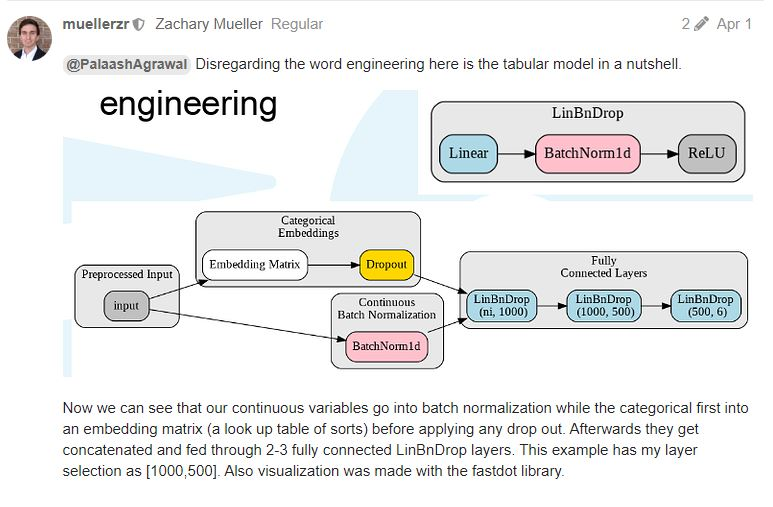

In [5]:
AMPs_df.shape

(86457, 5)

In [11]:
X_test = df_new.iloc[test_splits,:-1]
y_test = df_new.iloc[test_splits,-1]
X_train= df_new.iloc[train_splits,:-1]
y_train = df_new.iloc[train_splits,-1]

In [10]:
# PSSM
f = TrainTestSplitter(test_size=0.2, random_state=42)
train_splits,test_splits = f(AMPs_df)
splits = RandomSplitter(valid_pct=0.2)(range_of(train_splits))
df_new = AMPs_df[["reps"]].reps.apply(pd.Series).astype(np.float64)
df_new['class'] = AMPs_df['class']
df_new.columns = df_new.columns.astype(str)
df_new.columns
to = TabularPandas(df_new , cont_names  = reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)
dls = to.dataloaders()
dls.show_batch()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,class
0,0.523899,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.497691,0.498845,0.511956,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498918,0.498918,0.511209,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.498918,0.499278,0.499278,0.499278,0.507474,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499278,0.499206,0.499206,0.499206,0.499206,0.508221,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.498340,0.498340,0.498340,0.498340,0.498340,0.517184,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.498340,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.508221,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.517930,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.498268,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.508221,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.499206,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.553608,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.494804,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.502242,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.499784,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.511956,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.498845,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.532839,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.496825,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.497907,0.521662,0.497907,0.497907,0.497907,0.497907

## Prepare Data, Split Training, Validation, and Test set

In [4]:
# old 254036
# 242053
len(AMPs_df) 

137389

In [5]:
AMPs_df =AMPs_df[AMPs_df["length"] <= 260 ]

In [3]:
len(AMPs_df) 
### old
# 300 = 190916
# 378 = 202038
# 278 = 188054
# 200 = 175044
# 400 = 204710

# 478 = 212312
# 480 = 212418
# 490 พัง


####
#200 -169834


NameError: name 'AMPs_df' is not defined

Create index for Spliting  training, validation, and test set

In [5]:
f = TrainTestSplitter(test_size=0.2, random_state=42)
train_splits,test_splits = f(AMPs_df)

In [6]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_splits))
splits

((#87929) [101961,52235,98999,11166,5881,48909,3920,85040,108490,4951...],
 (#21982) [68830,91660,51557,99019,62751,31929,19311,56596,63318,7021...])

Transform from list of array into separate columns

In [9]:
#df =AMPs_df[["reps","class"]]
#df

In [7]:
 #df['reps'].apply(tuple).value_counts()
df_new = AMPs_df[["reps","class"]].reps.apply(pd.Series).astype(np.float64)
df_new['class'] = AMPs_df['class']
df_new

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,class
210,0.020596,0.051454,0.009273,0.008583,-0.158560,0.096443,-0.280527,-0.004144,-0.024222,0.139821,...,0.017658,-0.178922,0.061034,-0.049153,-0.008552,0.295699,0.078237,0.084181,-0.002584,0
371,0.006680,-0.095586,0.059442,-0.021558,0.138408,-0.023227,-0.168920,-0.101124,-0.007432,0.117733,...,0.028154,-0.020222,0.024706,-0.072173,0.014760,0.140324,0.024822,-0.013351,-0.060497,0
420,0.010706,0.005045,0.022312,-0.010357,-0.001492,0.035573,-0.232180,-0.016746,-0.010970,0.026109,...,0.133411,-0.094850,0.031804,-0.086968,-0.029461,0.069626,0.047517,0.130172,0.006449,0
168,0.002073,-0.076902,-0.021565,0.016011,-0.059204,0.027183,-0.491927,0.013376,-0.020296,0.069320,...,0.020355,-0.125865,0.025240,0.004637,-0.003113,0.012125,0.028679,0.384807,0.030021,0
344,0.029898,-0.004466,-0.015070,0.031181,-0.066619,0.152418,-0.388183,-0.017860,-0.035654,0.172902,...,-0.017706,-0.102827,0.035134,0.017357,0.010981,0.447118,0.093590,0.055483,0.014400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.013467,-0.135259,0.022123,0.004654,0.001060,0.035953,-0.242629,-0.004931,-0.015722,0.167582,...,0.067011,-0.050945,0.003909,0.007646,0.042930,0.086973,0.000517,0.206966,0.017166,0
447,0.019307,-0.030070,-0.012818,0.012989,0.020863,0.016052,-0.325731,-0.042692,-0.017072,0.111204,...,0.015929,-0.156615,0.030351,-0.023633,0.000660,0.026462,-0.004548,0.140177,0.027681,0
5,0.008608,-0.057360,0.019528,0.004598,-0.079074,0.019588,-0.113827,-0.013885,-0.014072,0.050159,...,0.008678,-0.124026,0.029327,-0.062297,-0.022352,0.069006,0.003294,0.120658,0.082524,0
477,0.014597,-0.139941,0.026719,0.003316,-0.017684,0.038440,-0.253193,-0.000880,-0.015894,0.151149,...,0.062336,-0.044791,-0.008192,0.044289,0.043903,0.078633,-0.006654,0.192273,0.040663,0


In [ ]:
del  AMPs_df

Pandas is rendering the column with 6 decimal places, it's storing it correctly

Convert column type to string 

In [8]:
df_new.columns = df_new.columns.astype(str)
df_new.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899',
       'class'],
      dtype='object', length=1901)

Feed data frame to TabularPandas function to  preprocess tabular data before assembling it in a DataLoader

In [9]:
to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)

Building our DataLoader

In [10]:
dls = to.dataloaders()
dls.show_batch()

Split data into test set

In [11]:
X_test = df_new.iloc[test_splits,:-1]
y_test = df_new.iloc[test_splits,-1]
X_train= df_new.iloc[train_splits,:-1]
y_train = df_new.iloc[train_splits,-1]

In [13]:
len(dls.train_ds)

87929

In [14]:
columns = cont_cat_split(dls.train_ds)
len(columns[0])

1900

## Baseline Model

In [12]:
def tst_param(val, grad=None):
    "Create a tensor with `val` and a gradient of `grad` for testing"
    res = tensor([val]).float()
    res.grad = tensor([val/10 if grad is None else grad]).float()
    return res

def calcHiddenLayer(data, alpha, numHiddenLayers):
  i = len(cont_cat_split(data.train_ds))
  o = 2
  io = i+o
  return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers #[( len(data.train_ds)/(alpha*(io)) ) ]
# 5 4
calcHiddenLayer (dls ,5,2)

[1383, 1383]

In [14]:
config = tabular_config(embed_p=0.5)
params  = tst_param([1,2,3], [0.1,0.2,0.3])
optimizer = QHAdam(params = params,lr=0.1, mom=0.999, sqr_mom=0.999, nu_1=0.7, nu_2=1.0)


In [15]:
learn = tabular_learner(dls, layers=[1383,1383,512,256],config =config , metrics=[accuracy, error_rate], opt_func= QHAdam)
# [1266,844,562,372,249]
# Backup old model 
#learn = tabular_learner(dls,metrics=[accuracy, error_rate])

In [16]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=400, out_features=1383, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1383, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1383, out_features=1383, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(1383, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1383, out_features=512, bias=False)
      (2): ReLU(inplace=True)
    )
    (3): LinBnDrop(
      (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=512, out_fea

In [17]:
learn.summary()

TabularModel (Input shape: 64 x torch.Size([64, 400]))
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 400            
BatchNorm1d                               800        True      
BatchNorm1d                               800        True      
____________________________________________________________________________
                     64 x 1383           
Linear                                    553200     True      
ReLU                                                           
BatchNorm1d                               2766       True      
Linear                                    1912689    True      
ReLU                                                           
BatchNorm1d                               2766       True      
____________________________________________________________________________
                     64 x 512            
Linear                                    708096     True      
ReLU                     

Which learning rate should I pick to train a model?
* https://forums.fast.ai/t/lesson-6-official-topic/69306/362

**The idea is to get  a low loss and has the highest learning rate before shooting up**

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=0.0002290867705596611)

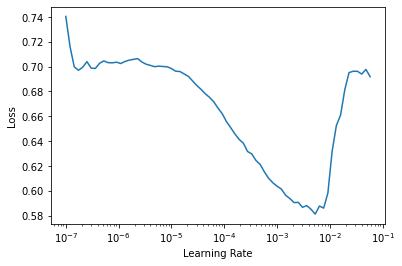

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.425842,0.418076,0.796067,0.203933,00:19
1,0.410956,0.413800,0.800188,0.199812,00:20
2,0.398078,0.430177,0.792308,0.207692,00:21
3,0.379102,0.372086,0.827586,0.172414,00:25
4,0.362973,0.369516,0.825707,0.174293,00:26
5,0.372315,0.357564,0.838864,0.161136,00:29
6,0.322546,0.329705,0.849346,0.150654,00:19
7,0.310181,0.328408,0.849057,0.150943,00:29
8,0.280571,0.328370,0.848189,0.151811,00:24
9,0.265292,0.324291,0.851659,0.148341,00:23


In [57]:
learn.fit(4,1e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.255578,0.293404,0.871486,0.128514,00:16
1,0.251050,0.270429,0.887817,0.112183,00:16
2,0.250269,0.267231,0.890729,0.109271,00:15
3,0.232056,0.271969,0.885497,0.114503,00:15


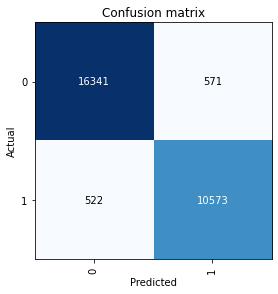

In [45]:
# predict the validation set with our model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

In [20]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.8516590595245361 %.


In [21]:
y_hat = np.argmax(preds,axis=1)
y_hat

tensor([1, 1, 0,  ..., 1, 0, 1])

In [22]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      8545
           1       0.83      0.77      0.80      5288

    accuracy                           0.85     13833
   macro avg       0.85      0.84      0.84     13833
weighted avg       0.85      0.85      0.85     13833



In [49]:
preds,y_true,y_hat=learn.get_preds( with_decoded=True)

In [28]:
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20511
           1       0.95      0.96      0.96     13311

    accuracy                           0.97     33822
   macro avg       0.96      0.96      0.96     33822
weighted avg       0.97      0.97      0.97     33822



In [28]:
# Save the model at this stage for retrain only 
# learn.save('TubularLearner.fastAI.nr70')

In [27]:
# export for production deployment
learn.export('/mnt/vdb/thesis/TubularLearner.V.retrain')

## Evaluation 

In [23]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9323643671618351


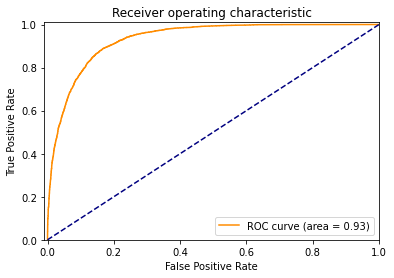

In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Predict with Test set

* https://forums.fast.ai/t/getting-predictions-get-preds-for-test-sets/32077
* https://forums.fast.ai/t/different-results-for-get-preds-and-predict/37938/14

In [25]:
dl = learn.dls.test_dl(X_test)
_preds,_none ,_y =learn.get_preds(dl=dl, with_decoded=True)

In [26]:
#3.00 new
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      8722
           1       0.90      0.78      0.84      8570

    accuracy                           0.85     17292
   macro avg       0.85      0.85      0.85     17292
weighted avg       0.85      0.85      0.85     17292



In [56]:
#278
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18692
           1       0.98      0.95      0.97     18919

    accuracy                           0.97     37611
   macro avg       0.97      0.97      0.97     37611
weighted avg       0.97      0.97      0.97     37611



In [46]:
# 378 
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     20165
           1       0.97      0.94      0.96     20243

    accuracy                           0.96     40408
   macro avg       0.96      0.96      0.96     40408
weighted avg       0.96      0.96      0.96     40408



In [45]:
# 300 
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     19179
           1       0.97      0.94      0.95     19005

    accuracy                           0.96     38184
   macro avg       0.96      0.96      0.96     38184
weighted avg       0.96      0.96      0.96     38184



In [32]:
# 200 no dropout 
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17596
           1       0.99      0.95      0.97     17413

    accuracy                           0.97     35009
   macro avg       0.97      0.97      0.97     35009
weighted avg       0.97      0.97      0.97     35009



In [44]:
# 480 with 1699 layers
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21180
           1       0.98      0.96      0.97     21304

    accuracy                           0.97     42484
   macro avg       0.97      0.97      0.97     42484
weighted avg       0.97      0.97      0.97     42484



In [29]:
# 480 no dropout
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21180
           1       0.98      0.96      0.97     21304

    accuracy                           0.97     42484
   macro avg       0.97      0.97      0.97     42484
weighted avg       0.97      0.97      0.97     42484



In [30]:
# 400
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     20443
           1       0.98      0.96      0.97     20499

    accuracy                           0.97     40942
   macro avg       0.97      0.97      0.97     40942
weighted avg       0.97      0.97      0.97     40942



In [32]:
# 480
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21180
           1       0.98      0.96      0.97     21304

    accuracy                           0.97     42484
   macro avg       0.97      0.97      0.97     42484
weighted avg       0.97      0.97      0.97     42484



In [32]:
# 460
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21108
           1       0.98      0.95      0.97     21170

    accuracy                           0.97     42278
   macro avg       0.97      0.97      0.97     42278
weighted avg       0.97      0.97      0.97     42278



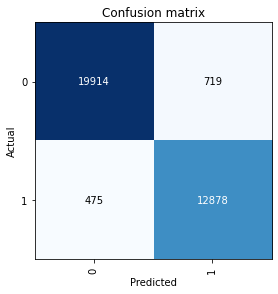

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

# Cross validation with entire dataset

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [11]:
test_preds = L()
roc_auc =[]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = skf.split(df_new.index, df_new['class'])
for x, y in res:
    ix = (L(list(x)), L(list(y)))
    to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)
    dls = to.dataloaders()
    learn = tabular_learner(dls, metrics=[accuracy, error_rate])
    learn.fit(5)
    preds,y_true,y_hat=learn.get_preds( with_decoded=True)
    
    # probs from log preds
    probs = np.exp(preds[:,1])
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, probs, pos_label=1)
    # Compute ROC area
    roc_auc_value = auc(fpr, tpr)
    # dl = learn.dls.test_dl(X_test)
    #_preds,_none ,_y=learn.get_preds(dl=dl, with_decoded=True)
    report = classification_report(y_true, y_hat, output_dict=True )
    test_preds.append(report)
    roc_auc.append(roc_auc_value)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.227649,0.212951,0.913886,0.086114,00:09
1,0.193928,0.197743,0.922676,0.077324,00:09
2,0.173828,0.187951,0.929678,0.070322,00:09
3,0.161690,0.197625,0.919547,0.080453,00:09
4,0.149521,0.185058,0.926400,0.073600,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.214857,0.210850,0.912545,0.087455,00:09
1,0.201579,0.202903,0.917461,0.082539,00:09
2,0.174965,0.184766,0.929082,0.070918,00:08
3,0.157580,0.196010,0.924315,0.075685,00:09
4,0.144191,0.182489,0.929827,0.070173,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.221115,0.213079,0.915375,0.084625,00:09
1,0.198572,0.196187,0.919994,0.080006,00:09
2,0.175895,0.203778,0.918504,0.081496,00:09
3,0.159192,0.186227,0.928188,0.071812,00:09
4,0.147595,0.199434,0.927294,0.072706,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.229403,0.215546,0.917312,0.082688,00:09
1,0.204027,0.202848,0.921931,0.078069,00:09
2,0.181722,0.190503,0.926549,0.073451,00:09
3,0.162576,0.185151,0.928188,0.071812,00:09
4,0.146492,0.184058,0.929082,0.070918,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.222375,0.217201,0.910757,0.089243,00:10
1,0.195977,0.201001,0.919696,0.080304,00:09
2,0.179451,0.198652,0.921484,0.078516,00:09
3,0.170154,0.178196,0.929678,0.070322,00:09
4,0.150044,0.177582,0.931317,0.068683,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.223066,0.221071,0.913290,0.086710,00:10
1,0.206617,0.201109,0.918504,0.081496,00:09
2,0.183944,0.211430,0.916865,0.083135,00:08
3,0.169436,0.183758,0.927741,0.072259,00:09
4,0.154639,0.185208,0.927145,0.072855,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.226526,0.211973,0.916269,0.083731,00:10
1,0.196870,0.200310,0.920590,0.079410,00:09
2,0.180042,0.190395,0.925507,0.074493,00:09
3,0.173193,0.182162,0.927294,0.072706,00:09
4,0.144491,0.181551,0.929082,0.070918,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.229149,0.219242,0.911502,0.088498,00:09
1,0.198815,0.208467,0.913439,0.086561,00:09
2,0.188303,0.189240,0.924166,0.075834,00:09
3,0.156603,0.183724,0.930274,0.069726,00:09
4,0.152765,0.187377,0.929827,0.070173,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.227774,0.221842,0.914035,0.085965,00:09
1,0.210642,0.197892,0.924762,0.075238,00:09
2,0.175309,0.185634,0.928635,0.071365,00:09
3,0.166967,0.198545,0.923272,0.076728,00:09
4,0.148030,0.189154,0.924315,0.075685,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.219974,0.216902,0.913737,0.086263,00:09
1,0.190007,0.201960,0.920441,0.079559,00:08
2,0.176040,0.195363,0.922527,0.077473,00:08
3,0.163035,0.187714,0.925060,0.074940,00:08
4,0.155417,0.187106,0.927145,0.072855,00:09


In [ ]:
#val_pct = L()
#test_pct = L()
test_preds = L()

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = skf.split(train.index, train['class'])
for x, y in res:
    ix = (L(list(x)), L(list(y)))
    to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)
    dls = to.dataloaders()
    learn = tabular_learner(dls, metrics=[accuracy, error_rate])
    learn.fit(15)
    dl = learn.dls.test_dl(X_test)
    _preds,_none ,_y=learn.get_preds(dl=dl, with_decoded=True)
    report = classification_report(y_test, _y, output_dict=True )
    test_preds.append(report) # HERE

In [51]:
test_preds[0]

{'0': {'precision': 0.8260779863833299,
  'recall': 0.9236447520184544,
  'f1-score': 0.8721411457198867,
  'support': 4335},
 '1': {'precision': 0.9066027088036117,
  'recall': 0.7921597633136095,
  'f1-score': 0.8455263157894737,
  'support': 4056},
 'accuracy': 0.8600881897270886,
 'macro avg': {'precision': 0.8663403475934708,
  'recall': 0.857902257666032,
  'f1-score': 0.8588337307546802,
  'support': 8391},
 'weighted avg': {'precision': 0.8650016276819431,
  'recall': 0.8600881897270886,
  'f1-score': 0.8592762011128368,
  'support': 8391}}

In [54]:
recall=[]
precision=[]
f1=[]
accuracy=[]

In [55]:
 for predss in test_preds:
    precision.append(predss['macro avg']['precision'])
    recall.append(predss['macro avg']['recall'])
    f1.append(predss['macro avg']['f1-score'])
    accuracy.append(predss['accuracy'])

In [56]:
accuracy

[0.922377830750894,
 0.9275923718712753,
 0.9229737783075089,
 0.9219308700834327,
 0.9255065554231228,
 0.9238676996424314,
 0.9280393325387366,
 0.926549463647199,
 0.9225268176400476,
 0.9170143027413588]

5 epoch

In [58]:

print( np.mean(precision),  np.std(precision)*2)

print(np.mean(recall) ,  np.std(recall)*2)

print(np.mean(accuracy), np.std(accuracy)*2)

print( np.mean(f1) , np.std(f1)*2)

print( np.mean(roc_auc), np.std(roc_auc)*2)

0.916700624386951 0.006881035414551252
0.9191999324019072 0.0076102573596765356
0.9238379022646006 0.00621873488353811
0.9178852243191266 0.006752870334547247
0.9768363468415895 0.0


10 epoch

In [81]:
precision =  np.mean(precision) 
print(precision)
recall =  np.mean(recall) 
print(recall)
accuracy =  np.mean(accuracy) 
print(accuracy)
f1 =  np.mean(f1) 
print(f1)
roc_auc =  np.mean(roc_auc) 
print(roc_auc)

0.9284401519804266
0.9293388727060199
0.9336114421930869
0.9288300957227161
0.9811167551824649


In [82]:
roc_auc

0.9811167551824649